In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# DataFrame
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

# Keras
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

# Word2vec
import gensim

# Utility
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools

# Set log
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
TRAIN_SIZE = 0.8


TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"


W2V_SIZE = 300
W2V_WINDOW = 7
W2V_EPOCH = 32
W2V_MIN_COUNT = 10


SEQUENCE_LENGTH = 300
EPOCHS = 8
BATCH_SIZE = 1024

POSITIVE = "POSITIVE"
NEGATIVE = "NEGATIVE"
NEUTRAL = "NEUTRAL"
SENTIMENT_THRESHOLDS = (0.4, 0.7)

KERAS_MODEL = "modeltest2_gru.h5"
WORD2VEC_MODEL = "modeltest2_gru.w2v"
TOKENIZER_MODEL = "tokenizertest2_gru.pkl"
ENCODER_MODEL = "encodertest2_gru.pkl"

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/training.1600000.processed.noemoticon.csv', encoding =DATASET_ENCODING , names=DATASET_COLUMNS)

In [ ]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df = df.sample(frac=1)

In [ ]:
df.head(50)

,target,ids,date,flag,user,text
1123088,4,1974444521,Sat May 30 13:08:59 PDT 2009,NO_QUERY,lweeks63,getting ready for work... Lisa
1432613,4,2060294404,Sat Jun 06 18:38:08 PDT 2009,NO_QUERY,magcampos,still hopefull for my Cubbies Have not missed...
1084650,4,1969029244,Fri May 29 22:50:24 PDT 2009,NO_QUERY,Jackdog24,@katmanduherself no lol cody is trying to sex...
1233585,4,1992201353,Mon Jun 01 08:22:08 PDT 2009,NO_QUERY,kenny277,One Night in Bangkok is THE BEST!!!! *DANCE*
176523,0,1965378850,Fri May 29 15:48:59 PDT 2009,NO_QUERY,Dogbook,Harley passed away in December 2008 http://ap...
361486,0,2046932144,Fri Jun 05 12:54:19 PDT 2009,NO_QUERY,daniellerangel,such a beautiful day outside and I am inside t...
1138260,4,1976827868,Sat May 30 19:12:12 PDT 2009,NO_QUERY,cjashton,is packed and ready to move
1528817,4,2177447407,Mon Jun 15 06:07:21 PDT 2009,NO_QUERY,carlos_teran,"@Ali167 Have a wonderful Monday, Ali."
1213983,4,1989402130,Mon Jun 01 01:24:27 PDT 2009,NO_QUERY,MusicADdicts,@FROactive I think we did meet if I'm not mist...
950520,4,1824018819,Sat May 16 23:45:25 PDT 2009,NO_QUERY,poijakosalem,I just made Caesar Salad dressing. yumm.


In [ ]:
print("Dataset size:", len(df))

Dataset size: 1600000


In [ ]:
decode_map = {0: "NEGATIVE", 2: "NEUTRAL", 4: "POSITIVE"}
def decode_sentiment(label):
    return decode_map[int(label)]

In [ ]:
%%time
df.target = df.target.apply(lambda x: decode_sentiment(x))

CPU times: user 815 ms, sys: 17.5 ms, total: 833 ms
Wall time: 874 ms


Text(0.5, 1.0, 'Dataset labels distribuition')

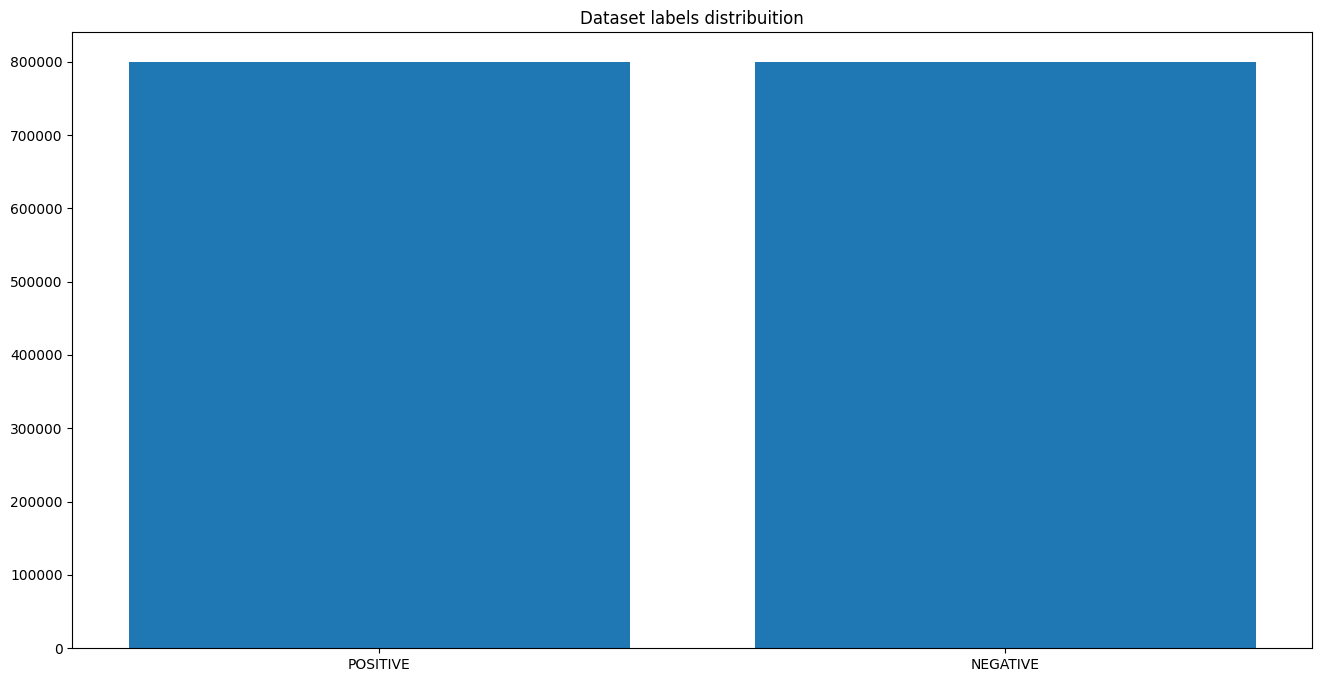

In [ ]:
target_cnt = Counter(df.target)

plt.figure(figsize=(16,8))
plt.bar(target_cnt.keys(), target_cnt.values())
plt.title("Dataset labels distribuition")

In [ ]:
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

In [ ]:
def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [ ]:
%%time
df.text = df.text.apply(lambda x: preprocess(x))

CPU times: user 1min 8s, sys: 338 ms, total: 1min 8s
Wall time: 1min 16s


In [ ]:
df_train, df_test = train_test_split(df, test_size=1-TRAIN_SIZE, random_state=42)
print("TRAIN size:", len(df_train))
print("TEST size:", len(df_test))

TRAIN size: 1280000
TEST size: 320000


In [ ]:
%%time
documents = [_text.split() for _text in df_train.text]

CPU times: user 5.41 s, sys: 616 ms, total: 6.02 s
Wall time: 6.15 s


In [ ]:
w2v_model = gensim.models.word2vec.Word2Vec(vector_size=W2V_SIZE,
                                            window=W2V_WINDOW,
                                            min_count=W2V_MIN_COUNT,
                                            workers=8)

In [ ]:
w2v_model.build_vocab(documents)

In [ ]:
%%time
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.text)

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

Total words 290711
CPU times: user 30.1 s, sys: 250 ms, total: 30.3 s
Wall time: 48.6 s


In [ ]:
import io
import json

# Saving
tokenizer_json = tokenizer.to_json()
with io.open('tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))

In [ ]:
%%time
x_train = pad_sequences(tokenizer.texts_to_sequences(df_train.text), maxlen=SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(df_test.text), maxlen=SEQUENCE_LENGTH)

CPU times: user 29.8 s, sys: 786 ms, total: 30.6 s
Wall time: 32.3 s


In [ ]:
labels = df_train.target.unique().tolist()
labels.append(NEUTRAL)
labels

['NEGATIVE', 'POSITIVE', 'NEUTRAL']

In [ ]:
encoder = LabelEncoder()
encoder.fit(df_train.target.tolist())

y_train = encoder.transform(df_train.target.tolist())
y_test = encoder.transform(df_test.target.tolist())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train",y_train.shape)
print("y_test",y_test.shape)

y_train (1280000, 1)
y_test (320000, 1)


In [ ]:
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print()
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (1280000, 300)
y_train (1280000, 1)

x_test (320000, 300)
y_test (320000, 1)


In [ ]:
y_train[:10]

array([[0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0]])

In [ ]:
embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
for word, i in tokenizer.word_index.items():
  if word in w2v_model.wv:
    embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

(290711, 300)


In [ ]:
embedding_layer = Embedding(vocab_size, W2V_SIZE, weights=[embedding_matrix], input_length=SEQUENCE_LENGTH, trainable=False)

# Model For Trainning

## Simple RNN

In [ ]:
from keras.layers import SimpleRNN

model = Sequential()
model.add(Embedding(vocab_size, 2, input_length=SEQUENCE_LENGTH))
model.add(SimpleRNN(32,return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 2)            581232    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1120      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 582,385
Trainable params: 582,385
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
8000/8000 [==============================] - 2055s 256ms/step - loss: 0.4925 - accuracy: 0.7607 - val_loss: 0.4692 - val_accuracy: 0.7792
Epoch 2/6
8000/8000 [==============================] - 2068s 258ms/step - loss: 0.4581 - accuracy: 0.7865 - val_loss: 0.4890 - val_accuracy: 0.7648
Epoch 3/6
8000/8000 [==============================] - 2081s 260ms/step - loss: 0.4464 - accuracy: 0.7944 - val_loss: 0.4790 - val_accuracy: 0.7746
Epoch 4/6
8000/8000 [==============================] - 2085s 261ms/step - loss: 0.4245 - accuracy: 0.8079 - val_loss: 0.4793 - val_accuracy: 0.7751
Epoch 5/6
8000/8000 [==============================] - 2118s 265ms/step - loss: 0.4095 - accuracy: 0.8162 - val_loss: 0.4872 - val_accuracy: 0.7668
Epoch 6/6
8000/8000 [==============================] - 2088s 261ms/step - loss: 0.4005 - accuracy: 0.8202 - val_loss: 0.5069 - val_accuracy: 0.7671


In [ ]:
%%time
score = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

313/313 [==============================] - 9s 30ms/step - loss: 0.5073 - accuracy: 0.7682

ACCURACY: 0.7681937217712402
LOSS: 0.5072503685951233
CPU times: user 9.44 s, sys: 301 ms, total: 9.74 s
Wall time: 10.7 s


In [ ]:
def plot_acc_loss(history):

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'bo', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

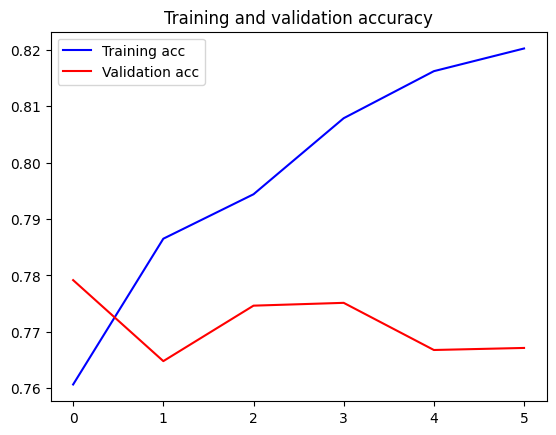

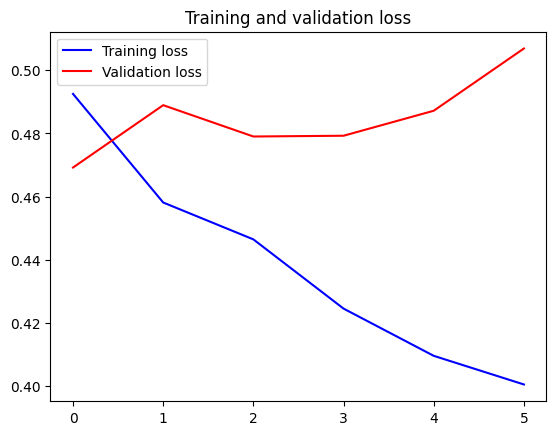

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
def decode_sentiment(score, include_neutral=True):
    if include_neutral:
        label = NEUTRAL
        if score <= SENTIMENT_THRESHOLDS[0]:
            label = NEGATIVE
        elif score >= SENTIMENT_THRESHOLDS[1]:
            label = POSITIVE

        return label
    else:
        return NEGATIVE if score < 0.5 else POSITIVE

In [ ]:
def predict(text, include_neutral=True):
    start_at = time.time()
    # Tokenize text
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=SEQUENCE_LENGTH)
    # Predict
    score = model.predict([x_test])[0]
    # Decode sentiment
    label = decode_sentiment(score, include_neutral=include_neutral)

    return {"label": label, "score": float(score),
       "elapsed_time": time.time()-start_at}

In [ ]:
predict("Today was my marriage aniversery and I proposed her again")

1/1 [==============================] - 0s 139ms/step


{'label': 'POSITIVE',
 'score': 0.9870448708534241,
 'elapsed_time': 0.21779179573059082}

In [ ]:
predict("I was kicked by the hotel manager because I made other guest unhappy")

1/1 [==============================] - 0s 43ms/step


{'label': 'NEGATIVE',
 'score': 0.04854927957057953,
 'elapsed_time': 0.07855057716369629}

In [ ]:
predict("Got luckey to get a family like mine to be supportive arround me always")

1/1 [==============================] - 0s 121ms/step


{'label': 'POSITIVE',
 'score': 0.8843143582344055,
 'elapsed_time': 0.2693033218383789}

In [ ]:
predict("She said YES ")

1/1 [==============================] - 0s 61ms/step


{'label': 'POSITIVE',
 'score': 0.7906350493431091,
 'elapsed_time': 0.10763287544250488}

In [ ]:
predict("PUBG is now banned in India")

1/1 [==============================] - 0s 131ms/step


{'label': 'NEGATIVE',
 'score': 0.16254423558712006,
 'elapsed_time': 0.27535176277160645}

In [ ]:
%%time
y_pred_1d = []
y_test_1d = list(df_test.target)
scores = model.predict(x_test, verbose=1, batch_size=8000)
y_pred_1d = [decode_sentiment(score, include_neutral=False) for score in scores]

40/40 [==============================] - 1s 29ms/step
CPU times: user 2.09 s, sys: 330 ms, total: 2.42 s
Wall time: 2.32 s


In [ ]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

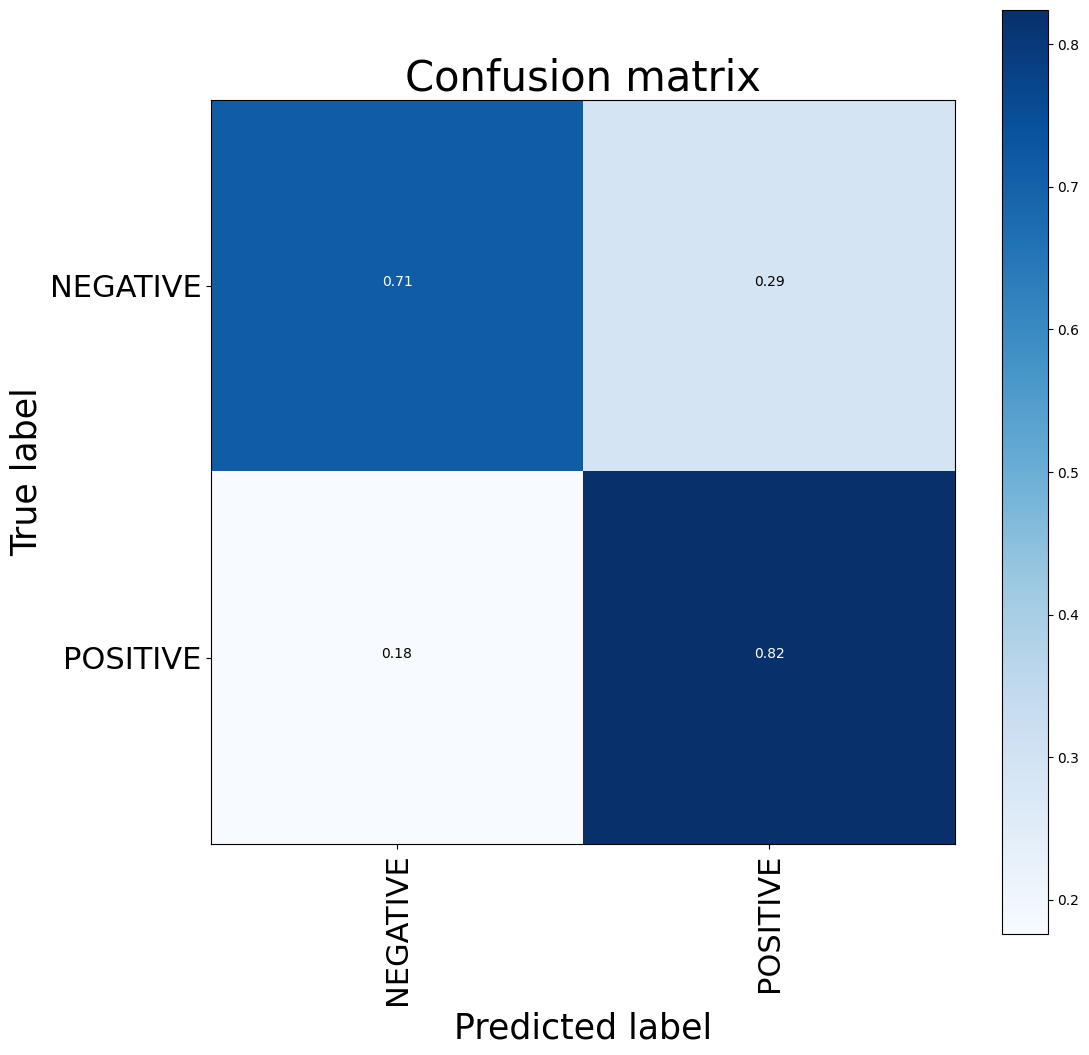

CPU times: user 1.99 s, sys: 289 ms, total: 2.28 s
Wall time: 2.06 s


In [ ]:
%%time

cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(12,12))
plot_confusion_matrix(cnf_matrix, classes=df_train.target.unique(), title="Confusion matrix")
plt.show()

In [ ]:
print(classification_report(y_test_1d, y_pred_1d))

              precision    recall  f1-score   support

    NEGATIVE       0.80      0.71      0.75    159994
    POSITIVE       0.74      0.82      0.78    160006

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



In [ ]:
accuracy_score(y_test_1d, y_pred_1d)

0.76819375

In [ ]:
model.save(KERAS_MODEL)
w2v_model.save(WORD2VEC_MODEL)
pickle.dump(tokenizer, open(TOKENIZER_MODEL, "wb"), protocol=0)
pickle.dump(encoder, open(ENCODER_MODEL, "wb"), protocol=0)

## GRU Model

In [ ]:
from keras.layers import GRU  # Import the GRU layer

model_gru = Sequential()
model_gru.add(Embedding(vocab_size, 2, input_length=SEQUENCE_LENGTH))
model_gru.add(GRU(32, return_sequences=False))  # Use GRU instead of SimpleRNN
model_gru.add(Dense(1, activation='sigmoid'))

model_gru.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 2)            581594    
                                                                 
 gru (GRU)                   (None, 32)                3456      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 585083 (2.23 MB)
Trainable params: 585083 (2.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_gru.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [ ]:
history = model_gru.fit(x_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
8000/8000 [==============================] - 155s 18ms/step - loss: 0.4814 - accuracy: 0.7687 - val_loss: 0.4599 - val_accuracy: 0.7821
Epoch 2/6
8000/8000 [==============================] - 103s 13ms/step - loss: 0.4405 - accuracy: 0.7946 - val_loss: 0.4576 - val_accuracy: 0.7835
Epoch 3/6
8000/8000 [==============================] - 98s 12ms/step - loss: 0.4227 - accuracy: 0.8051 - val_loss: 0.4615 - val_accuracy: 0.7811
Epoch 4/6
8000/8000 [==============================] - 97s 12ms/step - loss: 0.4106 - accuracy: 0.8114 - val_loss: 0.4651 - val_accuracy: 0.7802
Epoch 5/6
8000/8000 [==============================] - 97s 12ms/step - loss: 0.3972 - accuracy: 0.8187 - val_loss: 0.4723 - val_accuracy: 0.7771
Epoch 6/6
8000/8000 [==============================] - 96s 12ms/step - loss: 0.3874 - accuracy: 0.8239 - val_loss: 0.4814 - val_accuracy: 0.7747


In [ ]:
%%time
score = model_gru.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

313/313 [==============================] - 4s 8ms/step - loss: 0.4833 - accuracy: 0.7741

ACCURACY: 0.7741249799728394
LOSS: 0.48326563835144043
CPU times: user 3.1 s, sys: 588 ms, total: 3.69 s
Wall time: 5.28 s


In [ ]:
def plot_acc_loss(history):

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'bo', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

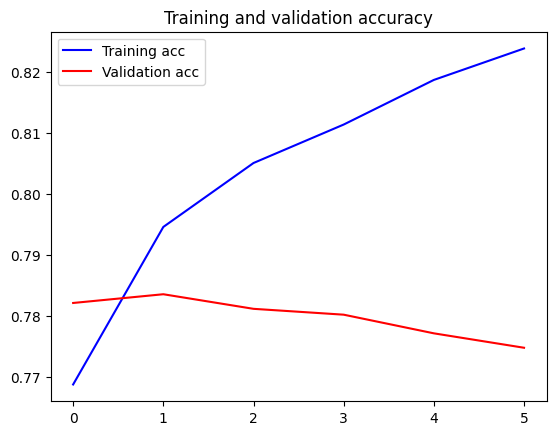

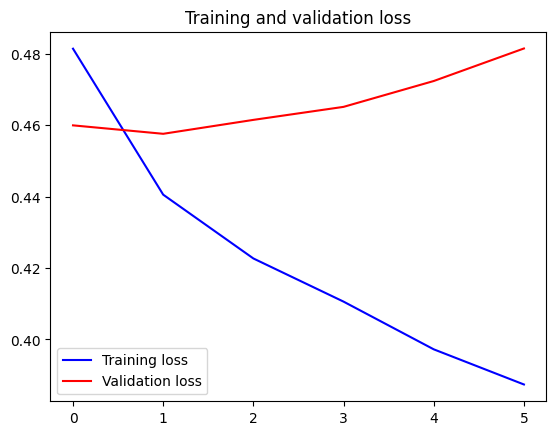

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
def decode_sentiment(score, include_neutral=True):
    if include_neutral:
        label = NEUTRAL
        if score <= SENTIMENT_THRESHOLDS[0]:
            label = NEGATIVE
        elif score >= SENTIMENT_THRESHOLDS[1]:
            label = POSITIVE

        return label
    else:
        return NEGATIVE if score < 0.5 else POSITIVE

In [ ]:
def predict(text, include_neutral=True):
    start_at = time.time()
    # Tokenize text
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=SEQUENCE_LENGTH)
    # Predict
    score = model_gru.predict([x_test])[0]
    # Decode sentiment
    label = decode_sentiment(score, include_neutral=include_neutral)

    return {"label": label, "score": float(score),
       "elapsed_time": time.time()-start_at}

In [ ]:
predict("I dont like to talk to anyone today.")

1/1 [==============================] - 0s 316ms/step


{'label': 'NEGATIVE',
 'score': 0.23090879619121552,
 'elapsed_time': 0.36948180198669434}

In [ ]:
predict("I am first in the race")

1/1 [==============================] - 0s 33ms/step


{'label': 'POSITIVE',
 'score': 0.8875918984413147,
 'elapsed_time': 0.09151721000671387}

In [ ]:
predict("My stomach is upset today")

1/1 [==============================] - 0s 33ms/step


{'label': 'NEGATIVE',
 'score': 0.013639895245432854,
 'elapsed_time': 0.09506726264953613}

In [ ]:
%%time
y_pred_1d = []
y_test_1d = list(df_test.target)
scores = model_gru.predict(x_test, verbose=1, batch_size=8000)
y_pred_1d = [decode_sentiment(score, include_neutral=False) for score in scores]

40/40 [==============================] - 2s 35ms/step
CPU times: user 2.98 s, sys: 723 ms, total: 3.71 s
Wall time: 3.78 s


In [ ]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

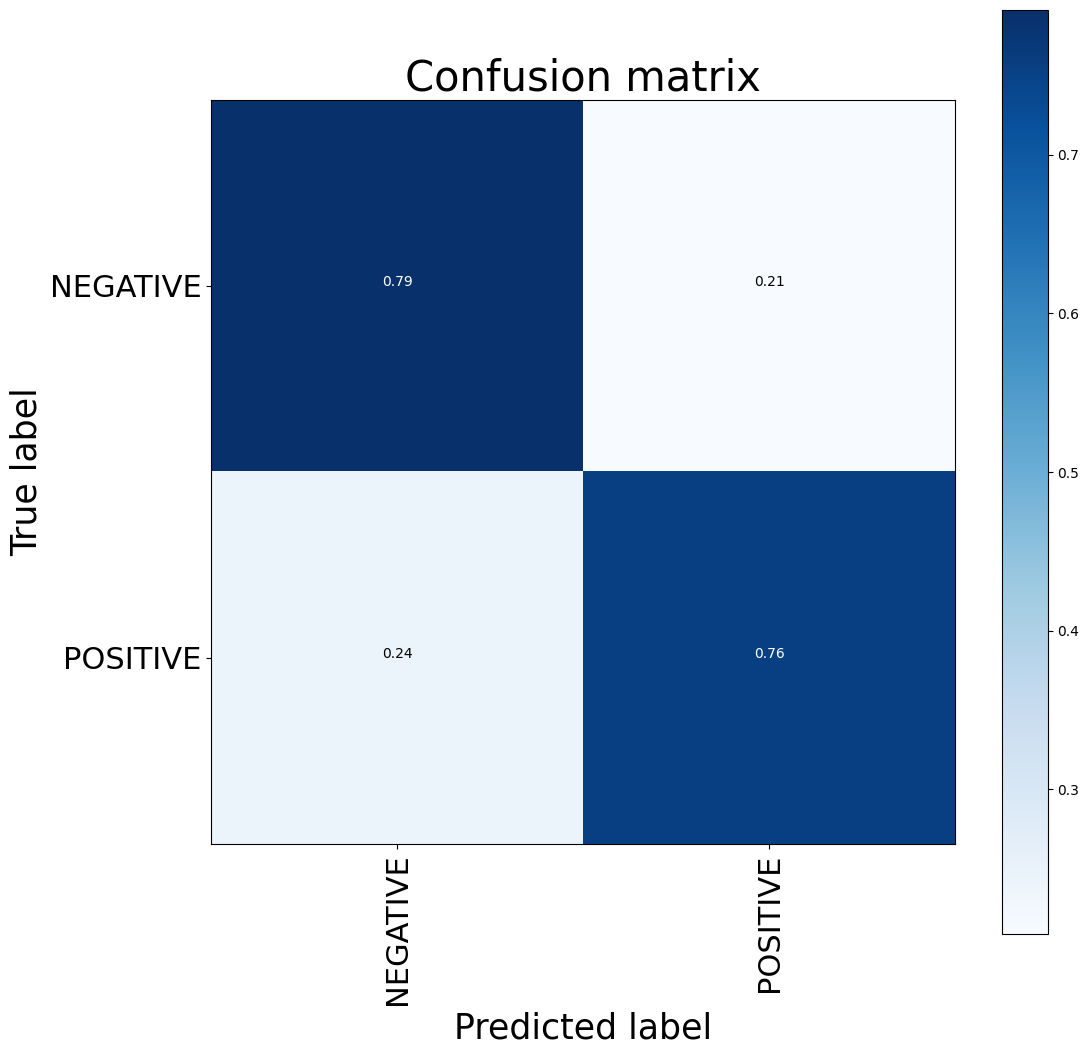

CPU times: user 1.93 s, sys: 231 ms, total: 2.17 s
Wall time: 2.5 s


In [ ]:
%%time

cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(12,12))
plot_confusion_matrix(cnf_matrix, classes=df_train.target.unique(), title="Confusion matrix")
plt.show()

In [ ]:
print(classification_report(y_test_1d, y_pred_1d))

              precision    recall  f1-score   support

    NEGATIVE       0.76      0.79      0.78    159986
    POSITIVE       0.78      0.76      0.77    160014

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



In [ ]:
accuracy_score(y_test_1d, y_pred_1d)

0.774125

In [ ]:
WORD2VEC_MODEL = "modeltest2_gru.txt"
model_gru.save(KERAS_MODEL)
w2v_model.save(WORD2VEC_MODEL)
pickle.dump(tokenizer, open(TOKENIZER_MODEL, "wb"), protocol=0)
pickle.dump(encoder, open(ENCODER_MODEL, "wb"), protocol=0)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Bidirectional

In [ ]:
from keras.layers import Bidirectional, LSTM

model_bi = Sequential()
model_bi.add(Embedding(vocab_size, 2, input_length=SEQUENCE_LENGTH))
model_bi.add(Bidirectional(LSTM(32, return_sequences=False)))  # Use Bidirectional LSTM
model_bi.add(Dense(1, activation='sigmoid'))

model_bi.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 2)            581422    
                                                                 
 bidirectional (Bidirection  (None, 64)                8960      
 al)                                                             
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 590447 (2.25 MB)
Trainable params: 590447 (2.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_bi.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [ ]:
history = model_bi.fit(x_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
8000/8000 [==============================] - 2456s 306ms/step - loss: 0.4806 - accuracy: 0.7689 - val_loss: 0.4608 - val_accuracy: 0.7813
Epoch 2/6
7686/8000 [===========================>..] - ETA: 1:30 - loss: 0.4386 - accuracy: 0.7951

KeyboardInterrupt: ignored

In [ ]:
%%time
score = model_gru.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

In [ ]:
def plot_acc_loss(history):

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'bo', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
def decode_sentiment(score, include_neutral=True):
    if include_neutral:
        label = NEUTRAL
        if score <= SENTIMENT_THRESHOLDS[0]:
            label = NEGATIVE
        elif score >= SENTIMENT_THRESHOLDS[1]:
            label = POSITIVE

        return label
    else:
        return NEGATIVE if score < 0.5 else POSITIVE

In [ ]:
def predict(text, include_neutral=True):
    start_at = time.time()
    # Tokenize text
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=SEQUENCE_LENGTH)
    # Predict
    score = model_gru.predict([x_test])[0]
    # Decode sentiment
    label = decode_sentiment(score, include_neutral=include_neutral)

    return {"label": label, "score": float(score),
       "elapsed_time": time.time()-start_at}

In [ ]:
predict("I dont like to talk to anyone today.")

In [ ]:
%%time
y_pred_1d = []
y_test_1d = list(df_test.target)
scores = model_gru.predict(x_test, verbose=1, batch_size=8000)
y_pred_1d = [decode_sentiment(score, include_neutral=False) for score in scores]

In [ ]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

In [ ]:
%%time

cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(12,12))
plot_confusion_matrix(cnf_matrix, classes=df_train.target.unique(), title="Confusion matrix")
plt.show()

In [ ]:
print(classification_report(y_test_1d, y_pred_1d))

In [ ]:
accuracy_score(y_test_1d, y_pred_1d)

In [ ]:
KERAS_MODEL = "modeltest2_bi.h5"
WORD2VEC_MODEL = "modeltest2_bi.pkl"
TOKENIZER_MODEL = "tokenizertest2_bi.pkl"
ENCODER_MODEL = "encodertest2_bi.pkl"

model_gru.save(KERAS_MODEL)
w2v_model.save(WORD2VEC_MODEL)
pickle.dump(tokenizer, open(TOKENIZER_MODEL, "wb"), protocol=0)
pickle.dump(encoder, open(ENCODER_MODEL, "wb"), protocol=0)